# Visualización de Distribuciones

## Explora el conjunto de datos sobre aves
Otra forma de profundizar en los datos es observar su distribución, o cómo se organizan los datos a lo largo de un eje. Quizás, por ejemplo, te gustaría conocer la distribución general para este conjunto de datos, de la envergadura máxima o la masa corporal máxima de las aves de Minnesota.

Descubramos algunos hechos sobre las distribuciones de los datos en este conjunto de datos. En el archivo notebook.ipynb en la raíz de la carpeta de esta lección, importa Pandas, Matplotlib, y tus datos:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
birds = pd.read_csv('../../data/birds.csv')
birds.head()

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


En general, puedes ver rápidamente la forma en que se distribuyen los datos usando un gráfico de dispersión como hicimos en la lección anterior:

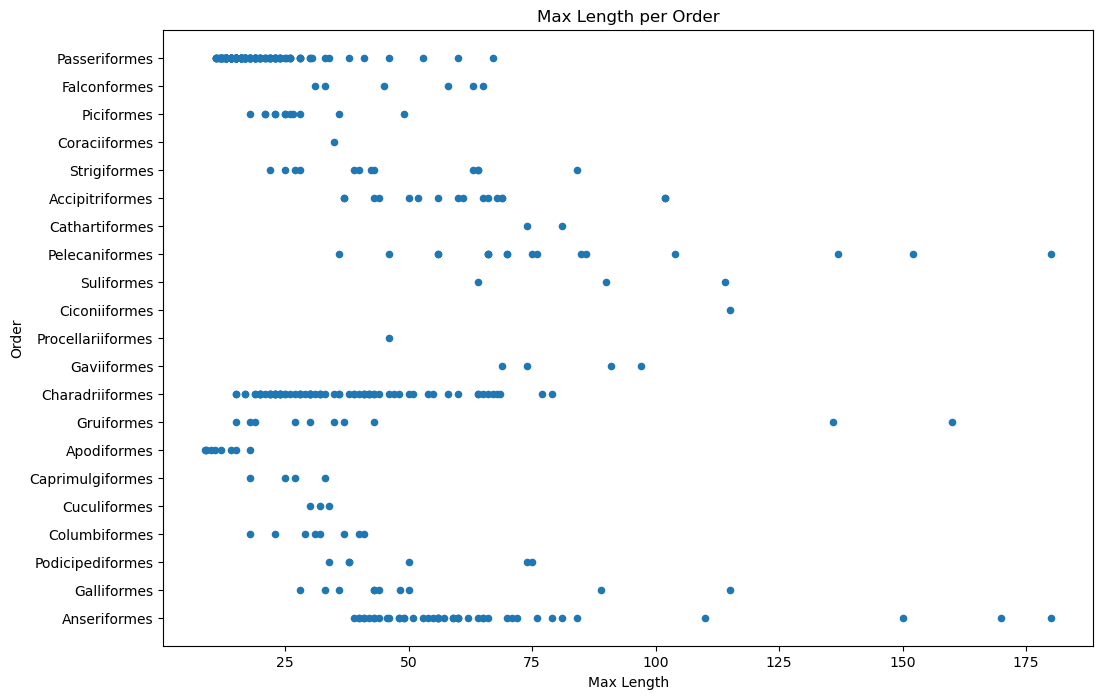

In [4]:
birds.plot(kind='scatter',x='MaxLength',y='Order',figsize=(12,8))

plt.title('Max Length per Order')
plt.ylabel('Order')
plt.xlabel('Max Length')

plt.show()

Esto da una visión general de la distribución de la longitud del cuerpo por orden de las aves, pero no es la forma óptima de mostrar las verdaderas distribuciones. Esa tarea se suele realizar creando un Histograma.

## Trabajando con histogramas
Matplotlib ofrece muy buenas formas de visualizar la distribución de los datos utilizando Histogramas. Este tipo de gráfico es como un gráfico de barras en el que la distribución se puede ver a través de la subida y bajada de las barras. Para construir un histograma, necesitas datos numéricos. Para construir un Histograma, puedes trazar un gráfico definiendo el tipo como 'hist' para Histograma. Este gráfico muestra la distribución de MaxBodyMass para todo el rango de datos numéricos del conjunto de datos. Al dividir el conjunto de datos que se le da en intervalos más pequeños, puede mostrar la distribución de los valores de los datos:

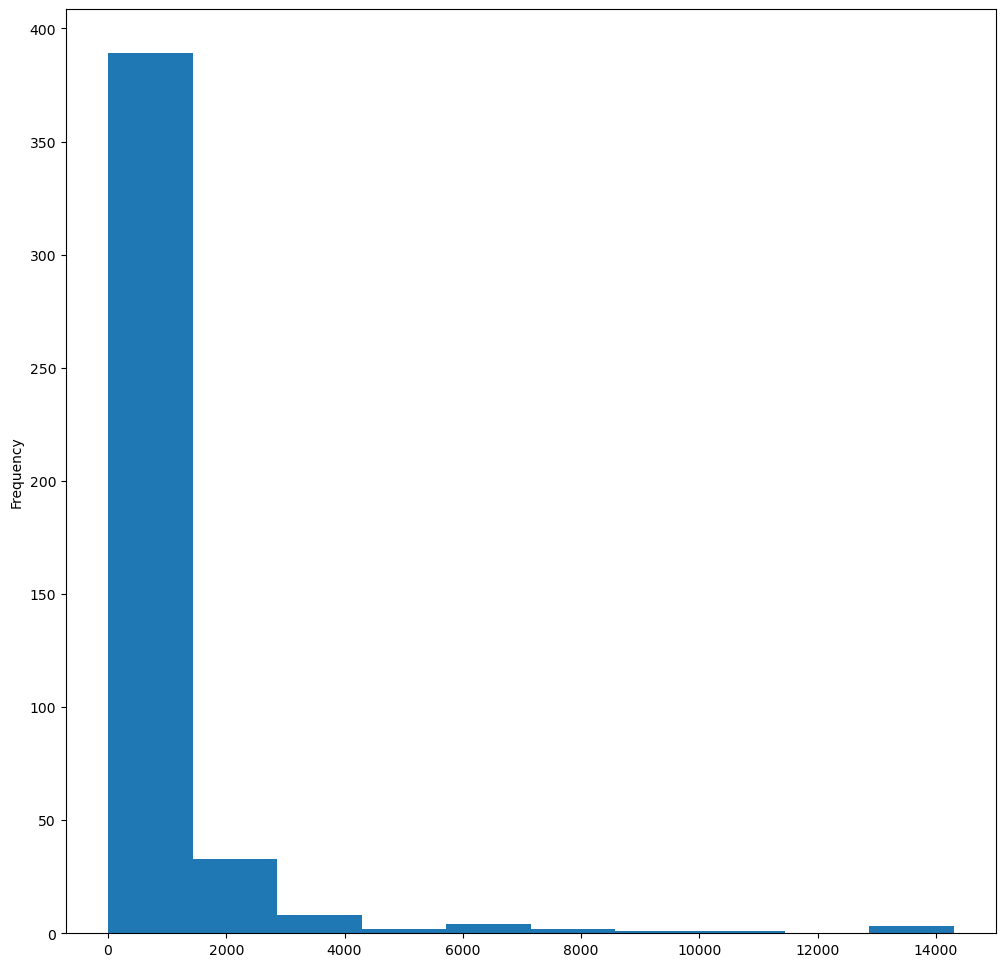

In [7]:
birds['MaxBodyMass'].plot(kind = 'hist', bins = 10, figsize = (12,12))
plt.show()

Como puedes ver, la mayoría de los más de 400 pájaros de este conjunto de datos se encuentran en el rango de menos de 2000 para su masa corporal máxima. Puedes obtener más información sobre los datos cambiando el parámetro bins a un número mayor, algo así como 30:

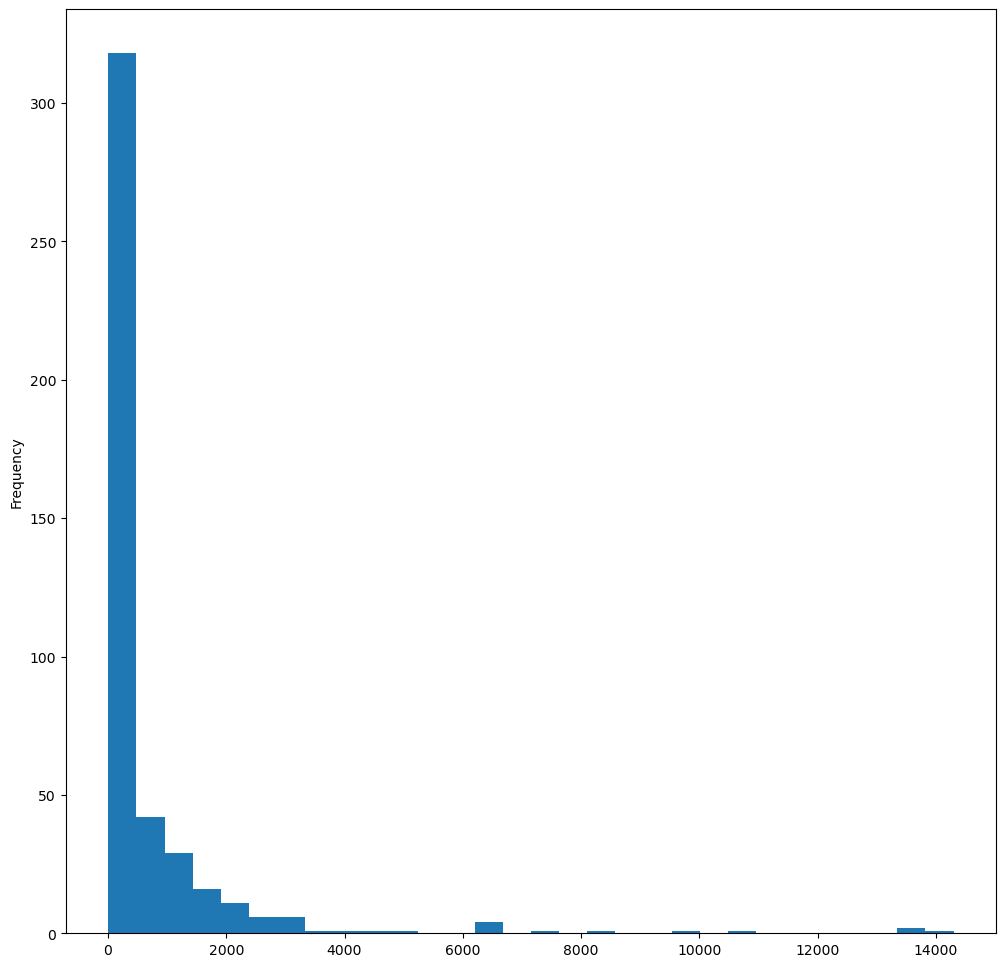

In [8]:
birds['MaxBodyMass'].plot(kind = 'hist', bins = 30, figsize = (12,12))
plt.show()

Este gráfico muestra la distribución de forma un poco más granular. Se podría crear un gráfico menos sesgado hacia la izquierda asegurándose de que sólo se seleccionan datos dentro de un rango determinado:

Filtra tus datos para obtener sólo las aves cuya masa corporal es inferior a 60, y mostrar 40 bins:

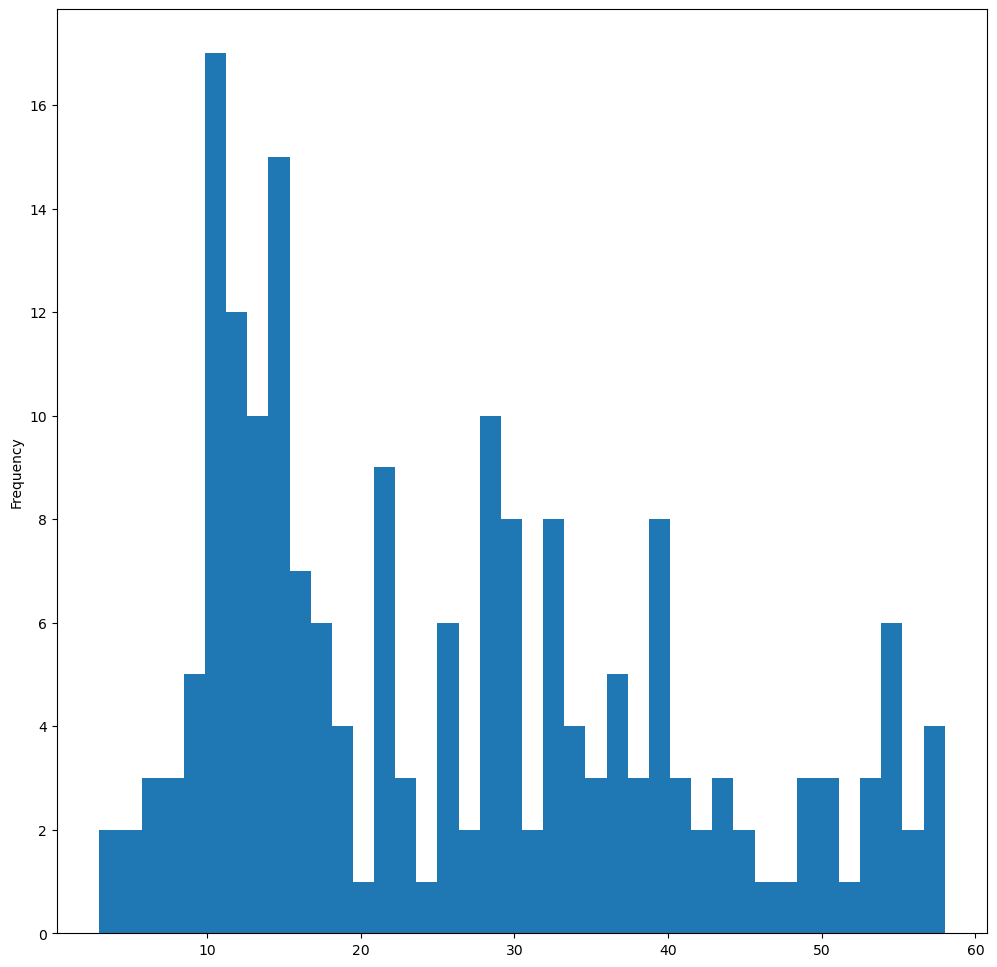

In [9]:
filteredBirds = birds[(birds['MaxBodyMass'] > 1) & (birds['MaxBodyMass'] < 60)]      
filteredBirds['MaxBodyMass'].plot(kind = 'hist',bins = 40,figsize = (12,12))
plt.show()     

El histograma ofrece algunas mejoras de color y etiquetado para probar también:

Crea un histograma 2D para comparar la relación entre dos distribuciones. Comparemos MaxBodyMass vs. MaxLength. Matplotlib ofrece una forma integrada de mostrar la convergencia utilizando colores más brillantes:

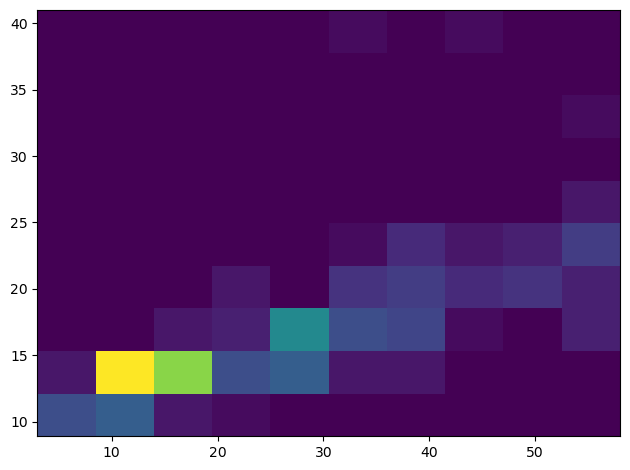

In [11]:
x = filteredBirds['MaxBodyMass']
y = filteredBirds['MaxLength']

fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(x, y)

Los histogramas funcionan bien por defecto para los datos numéricos. ¿Y si necesita ver las distribuciones según los datos de texto?

## Explorar el conjunto de datos para ver las distribuciones según los datos de texto
Este conjunto de datos también incluye buena información sobre la categoría de ave, su género, especie y familia, así como su estado de conservación. Exploremos esta información sobre la conservación. Cuál es la distribución de las aves según su estado de conservación?

Estos son valores basados en texto, por lo que tendrás que hacer una transformación para crear un histograma. Utilizando el dataframe de FilteredBirds, muestra su estado de conservación junto con su envergadura mínima. 

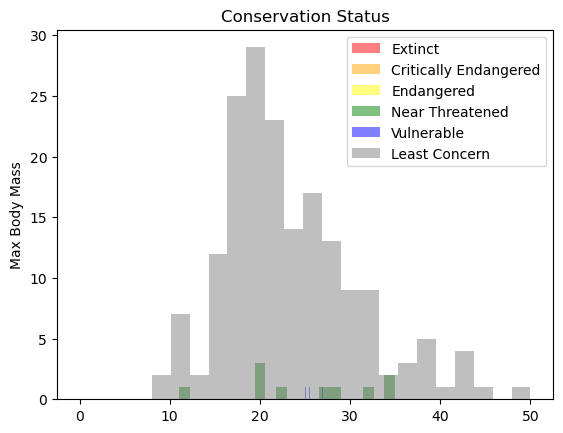

In [12]:
x1 = filteredBirds.loc[filteredBirds.ConservationStatus=='EX', 'MinWingspan']
x2 = filteredBirds.loc[filteredBirds.ConservationStatus=='CR', 'MinWingspan']
x3 = filteredBirds.loc[filteredBirds.ConservationStatus=='EN', 'MinWingspan']
x4 = filteredBirds.loc[filteredBirds.ConservationStatus=='NT', 'MinWingspan']
x5 = filteredBirds.loc[filteredBirds.ConservationStatus=='VU', 'MinWingspan']
x6 = filteredBirds.loc[filteredBirds.ConservationStatus=='LC', 'MinWingspan']

kwargs = dict(alpha=0.5, bins=20)

plt.hist(x1, **kwargs, color='red', label='Extinct')
plt.hist(x2, **kwargs, color='orange', label='Critically Endangered')
plt.hist(x3, **kwargs, color='yellow', label='Endangered')
plt.hist(x4, **kwargs, color='green', label='Near Threatened')
plt.hist(x5, **kwargs, color='blue', label='Vulnerable')
plt.hist(x6, **kwargs, color='gray', label='Least Concern')

plt.gca().set(title='Conservation Status', ylabel='Max Body Mass')
plt.legend()

No parece haber una buena correlación entre la envergadura mínima y el estado de conservación. Prueba otros elementos del conjunto de datos utilizando este método. También puedes probar diferentes filtros. ¿Encuentras alguna correlación?

## Gráficos de densidad
Habrás notado que los histogramas que hemos visto hasta ahora están "escalonados" y no fluyen suavemente en un arco. Para mostrar un gráfico de densidad más suave, puedes probar con un gráfico de densidad.

Para trabajar con gráficos de densidad, familiarízate con una nueva biblioteca de trazado, Seaborn.

Cargando Seaborn, intenta un gráfico de densidad básico:

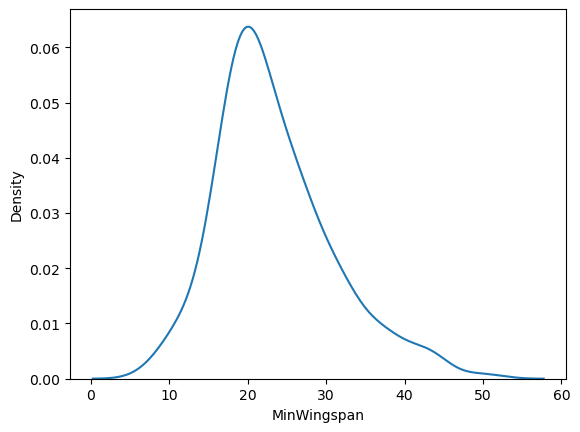

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(filteredBirds['MinWingspan'])
plt.show()

Puedes ver cómo el gráfico se asemeja al anterior para los datos de envergadura mínima; sólo que es un poco más suave. De acuerdo con la documentación de Seaborn, "En relación con un histograma, KDE puede producir un gráfico que es menos desordenado y más interpretable, especialmente cuando se dibujan múltiples distribuciones. Pero tiene el potencial de introducir distorsiones si la distribución subyacente está acotada o no es suave. Al igual que un histograma, la calidad de la representación también depende de la selección de buenos parámetros de suavización." fuente En otras palabras, los valores atípicos, como siempre, harán que tus gráficos se comporten mal.

Si quieres volver a ver esa línea dentada de MaxBodyMass en el segundo gráfico que construiste, podrías suavizarla muy bien recreándola con este método:

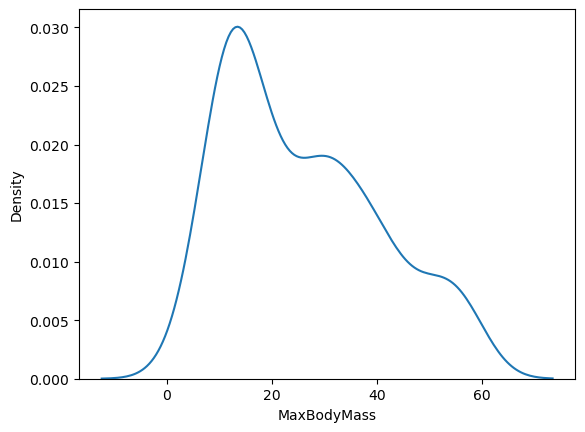

In [14]:
sns.kdeplot(filteredBirds['MaxBodyMass'])
plt.show()

Si quieres una línea suave, pero no demasiado suave, edita el parámetro bw_adjust:

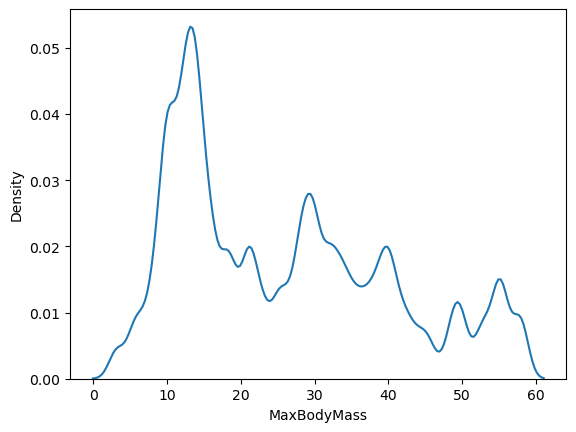

In [15]:
sns.kdeplot(filteredBirds['MaxBodyMass'], bw_adjust=.2)
plt.show()

Este tipo de gráfico ofrece bonitas visualizaciones explicativas. Con unas pocas líneas de código, por ejemplo, se puede mostrar la densidad de masa corporal máxima por orden de aves:

C:\Users\HP\AppData\Local\Temp\ipykernel_2472\1933666654.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


<Axes: xlabel='MaxBodyMass', ylabel='Density'>

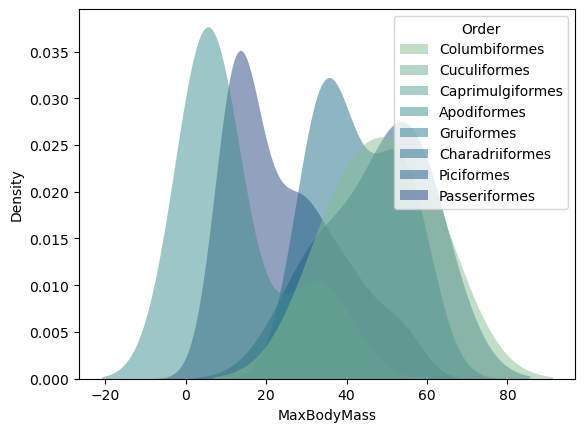

In [16]:
sns.kdeplot(
   data=filteredBirds, x="MaxBodyMass", hue="Order",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

También puedes mapear la densidad de varias variables en un gráfico. Observa la longitud máxima y mínima de un ave en comparación con su estado de conservación:

C:\Users\HP\AppData\Local\Temp\ipykernel_2472\49960699.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=filteredBirds, x="MinLength", y="MaxLength", hue="ConservationStatus")


<Axes: xlabel='MinLength', ylabel='MaxLength'>

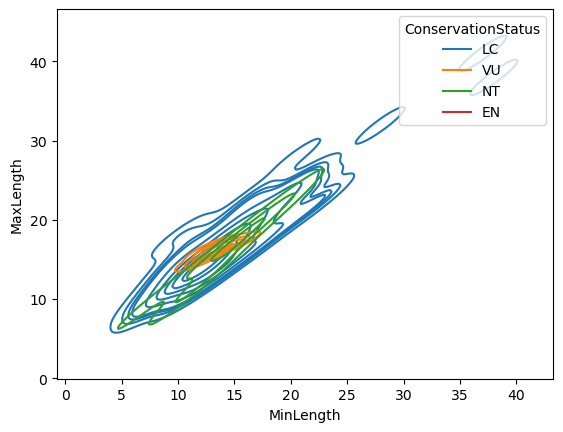

In [17]:
sns.kdeplot(data=filteredBirds, x="MinLength", y="MaxLength", hue="ConservationStatus")

Tal vez valga la pena investigar si la agrupación de aves "Vulnerables" según su longitud tiene sentido o no.

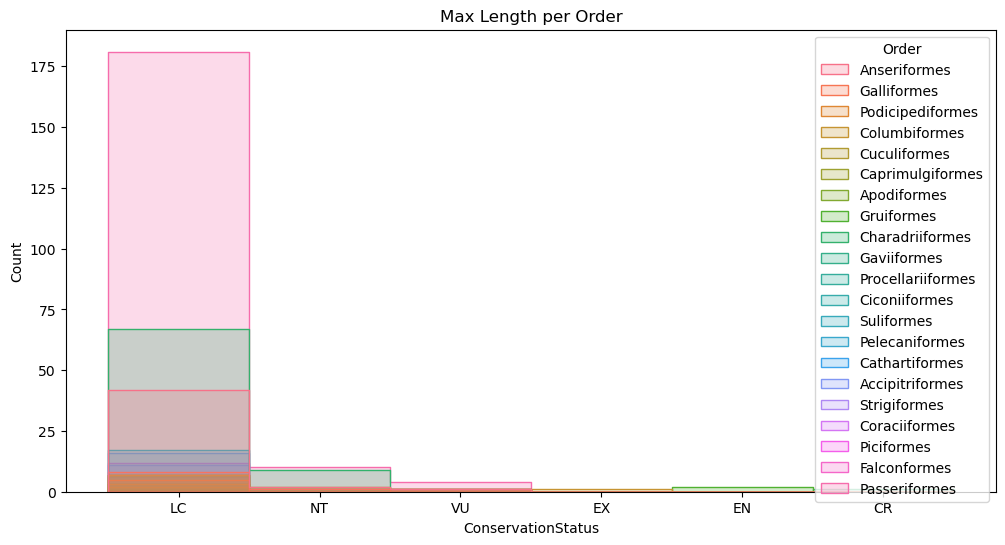

In [19]:
plt.figure(figsize=(12,6))
grafic = sns.histplot(data=birds, x='ConservationStatus',kde=False, hue='Order', element='step')
plt.title('Max Length per Order')
plt.show()

En esta lección, se ha utilizado Matplotlib y empezado a trabajar con Seaborn para mostrar gráficos más sofisticados. Investiga un poco sobre kdeplot en Seaborn, una "curva de densidad de probabilidad continua en una o más dimensiones".